# 1. Matriu de confusió

Respon els apartats a, b i c sobre el codi següent.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


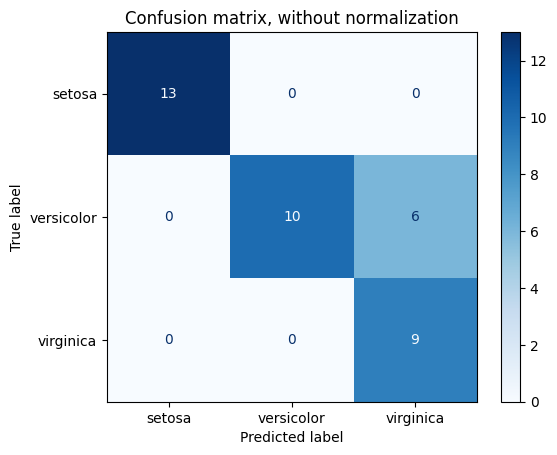

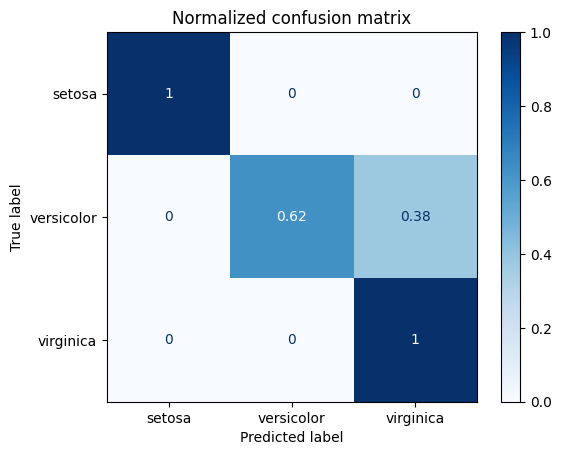

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

a) Afegeix codi que mostri quina és la mida dels conjunts d'entrenament i validació.

b) Quin model de classificació s'està usant?

c) De quin càlcul surten els nombres 0.62 i 0.38?

d) Modifica els valors dels vectors **y_true** i **y_pred**, sense canviar la longitud dels vectors, de forma que els **falsos positius** (fp) augmentin en una unitat i els **veritables negatius** (tn) davallin una unitat.

In [4]:
# y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
# y_pred = [0, 1, 0, 1, 0, 1, 0, 1, 0]
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# tn, fp, fn, tp

# 2. Corba ROC

In [5]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [6]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

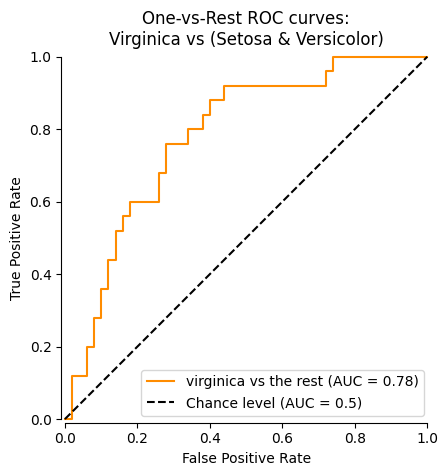

In [7]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

a) Explicau el significat de la línia negra discontínua, de pendent 1.

b) Obteniu el valor i el gràfic de l'àrea sota la corba per a la classe "setosa", amb les etiquetes corresponents.

c) Obteniu el valor i el gràfic de l'àrea sota la corba de la classe "virginica", amb les etiquetes corresponents.

d) Ordenau les tres classes per qualitat de classificació, d'acord amb la seva àrea sota la corba.

# 3. Corbes de validació

In [8]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),
)
train_scores
valid_scores

array([[0.9 , 0.9 , 0.9 , 0.97, 0.9 ],
       [0.9 , 0.83, 0.97, 0.97, 0.93],
       [1.  , 0.93, 1.  , 1.  , 0.9 ]])

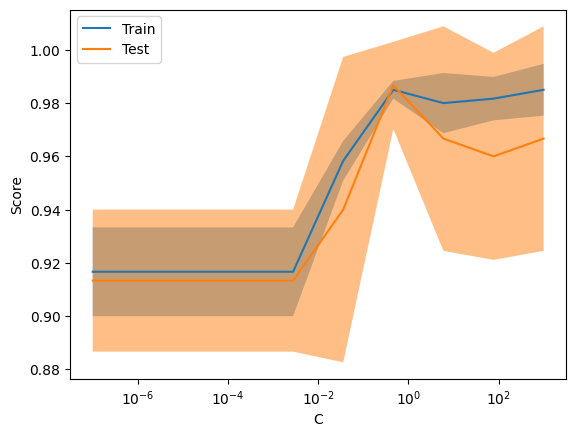

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

a) A la corba de validació anterior, modificau el codi perquè en lloc de potències de deu, mostri el resultat per a potències de 2, en un rang similar.

b) Quin és en aquest cas el punt d'equilibri entre infraajust i sobreajust?

# 4. Regressió

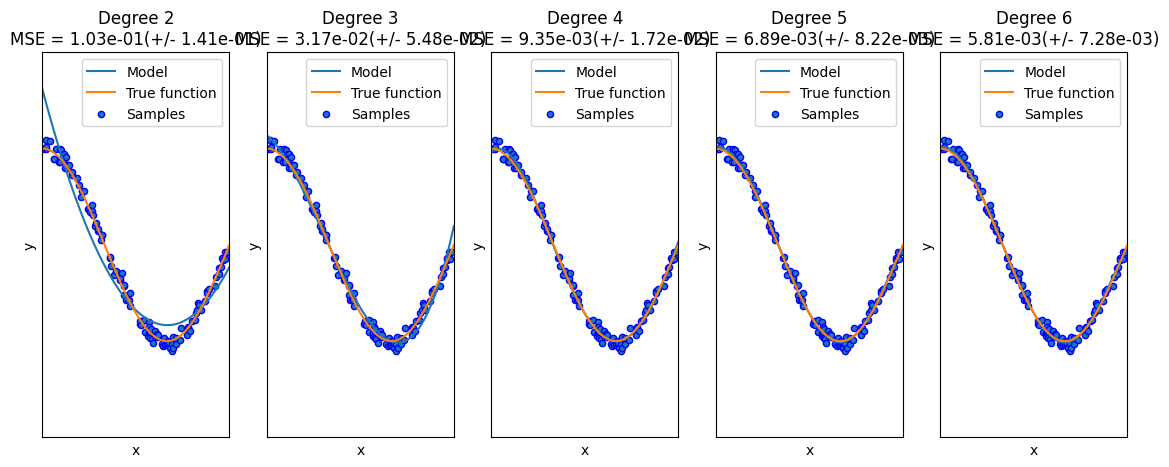

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 120
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

a) Quan els graus dels polinomis són 1,4 i 15 està clar que el millor ajust es produeix per al grau 4. Ara bé, afinem una mica més al voltant de 4. Per això, modificau el vector de graus perquè contengui els valors 2, 3, 4, 5,6.

b) Quin és en aquest cas el grau que obté un valor més baix d'error quadràtic mitjà? Quin és aquest valor?

c) Correspon amb el gràfic més ajustat entre les corbes blava i taronja?

d) Duplicau el nombre de mostres preses (n_samples). En aquest cas coincideixen l'error quadràtic mitjà i les corbes més coincidents? Per a quin grau del polinomi?